<a href="https://colab.research.google.com/github/Shunl1996/CIS545_HWs/blob/hw4/CIS545_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 545 Homework 4 : Machine Learning
## Due November 16th, 10pm EST
### Worth 100 points in total
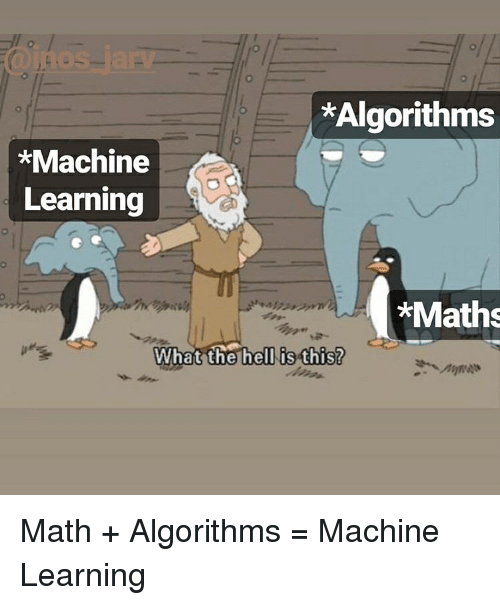

Hopefully everyone is doing well after this midterm - we're halfway there! We hope to continue to equip your data science toolkit with new skills through out the remainder of the semester. 

This homework will give you a hands on experience with machine learning with sklearn and scalable machine learning with Spark ML! 

Since most of us are isolated in the comfort and safety of our homes, our biggest source of entertainment is through online media platforms like Netflix, Prime Video, Hulu and YouTube. We will be exploring what makes videos successful on these platforms focusing on YouTube's data. 

**PLEASE READ THE FAQ** as you do this assignment! It's pinned on Piazza and we TA's work really hard to keep it updated with everything you might need to know or anything we might have failed to specify. Writing these HWs and test cases gets tricky since students always end up implementing solutions that we did not anticipate and thus could not have prepared the grader correctly for.

### Libraries and Setup Jargon!
Run the following  cells to setup the notebook. When prompted for a selection, select the number that is associated with java 8

In [1]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 12 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [1]:
%%capture
!pip3 install penngrader

from penngrader.grader import *

VERY IMPORTANT : Enter your **8 digit Penn ID** in the student id field below

PLEASE NOTE: There are some questions, for example making plots, that do not have test cases. All questions without an autograder attached will be manually graded. 

In [2]:
!pip3 install pandas==1.0.5

     |████████████████████████████████| 10.1MB 3.9MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.5 which is incompatible.
  Found existing installation: pandas 1.1.4
    Uninstalling pandas-1.1.4:
      Successfully uninstalled pandas-1.1.4


In [2]:
# make sure that this cell prints True! Otherwise you may have forgotten to
# restart your runtime after running the cell above
import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [3]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID =  29785339

In [4]:
grader = PennGrader(homework_id = 'CIS545_Spring_2020_HW4', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 29785339

Make sure this correct or we will not be able to store your grade


In [5]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

In [6]:
## If boto3 not already installed uncomment the following:
!pip3 install boto3

     |████████████████████████████████| 133kB 5.4MB/s 
     |████████████████████████████████| 71kB 4.6MB/s 
     |████████████████████████████████| 6.8MB 6.9MB/s 
     |████████████████████████████████| 133kB 40.7MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.0.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [7]:
import boto3
from botocore import UNSIGNED

from botocore.config import Config

s3 = boto3.resource('s3', config=Config(signature_version=UNSIGNED))
s3.Bucket('penn-cis545-files').download_file('youtube_data.zip', 'youtube_data.zip')

!unzip /content/youtube_data.zip

Archive:  /content/youtube_data.zip
   creating: youtube_data/
  inflating: youtube_data/IN_category_id.json  
   creating: __MACOSX/
   creating: __MACOSX/youtube_data/
  inflating: __MACOSX/youtube_data/._IN_category_id.json  
  inflating: youtube_data/.DS_Store  
  inflating: __MACOSX/youtube_data/._.DS_Store  
  inflating: youtube_data/FR_category_id.json  
  inflating: __MACOSX/youtube_data/._FR_category_id.json  
  inflating: youtube_data/INvideos.csv  
  inflating: __MACOSX/youtube_data/._INvideos.csv  
  inflating: youtube_data/CAvideos.csv  
  inflating: __MACOSX/youtube_data/._CAvideos.csv  
  inflating: youtube_data/FRvideos.csv  
  inflating: __MACOSX/youtube_data/._FRvideos.csv  
  inflating: youtube_data/CA_category_id.json  
  inflating: __MACOSX/youtube_data/._CA_category_id.json  
  inflating: youtube_data/US_category_id.json  
  inflating: __MACOSX/youtube_data/._US_category_id.json  
  inflating: youtube_data/USvideos.csv  
  inflating: __MACOSX/youtube_data/._USvide

# Section 1 : Machine Learning with Sklearn (45 points)

## 1.1 Data loading and Preprocessing (5 pts)

The dataset we will be using is a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [8]:
# Import all the csv files
files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
sorted(files)

# TODO Combine all into a single dataframe "combined_data" and add a 'country' column. 
all_dataframes = list()
for csv in files:
  pd_csv = pd.read_csv(csv,index_col='video_id')
  country_lst = [s for s in csv if s.isupper()]
  country = ''
  for s in country_lst:
    country += s
  pd_csv['country'] = country 
  all_dataframes.append(pd_csv)



combined_data = pd.concat(all_dataframes)

In [9]:
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,IN
dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",IN
mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...,IN


In [10]:
# Grader cell 

# 2 pts
grader.grade('check_combined_dataframe', (combined_data.shape))
grader.grade('check_country',(combined_data.country))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [11]:
combined_data['category_id'] = combined_data['category_id'].astype(str)

#Your code goes here
file = '/content/youtube_data/US_category_id.json'
js = json.load(open(file))
items = js['items']
map_for_utb = pd.DataFrame()
ids = []
titles = []
for i in items:
  sinppet = i['snippet']
  title = sinppet['title']
  id = i['id']
  ids.append(id)
  titles.append(title)

map_for_utb['id'] = ids
map_for_utb['title'] = titles

to_insert = combined_data.merge(map_for_utb,how='inner',left_on='category_id',right_on='id')['title_y']

combined_data.insert(4,'category', to_insert.to_list())

In [12]:
combined_data

,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,People & Blogs,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,People & Blogs,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,People & Blogs,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,People & Blogs,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,Movies,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,IN
dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,Movies,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",IN
mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,Movies,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...,IN


In [13]:
# Grader Cell 2 pts
grader.grade('check_category_mapping',(combined_data.category))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [14]:
# Your code goes here
combined_data['trending_date'] = pd.to_datetime(combined_data['trending_date'],format="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data['publish_time'],infer_datetime_format=True)

# Code to remove NA's
combined_data = combined_data.dropna()



In [15]:
combined_data

,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,People & Blogs,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,People & Blogs,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US
puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,People & Blogs,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,People & Blogs,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iNHecA3PJCo,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,Movies,2018-06-13 08:01:11+00:00,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,IN
dpPmPbhcslM,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,Movies,2018-06-13 11:30:04+00:00,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",IN
mV6aztP58f8,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,Movies,2018-06-13 05:00:02+00:00,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...,IN


In [16]:
# Grader cell 1 pt
grader.grade('validate_na',(combined_data.shape))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.2 EDA and Feature Engineering (20 pts)


**EDA:** Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

**Feature Engineering:** Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These new features can be used to improve the performance of machine learning algorithms. Features are also commonly referred to as covariates, predictors, or put more simply, new columns in our df.

#### 1.2.1: Mean, standard deviation, min and max. (1 pt)

Compute some simple statistics like mean, standard deviation, min and max for each of the numerical features in the dataset and store them into lists in order [views, likes, dislikes, comment_count]

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds

In [17]:
# Your code goes here
pd_for_stat = combined_data[['views','likes','dislikes','comment_count']]
maxs = pd_for_stat.max(axis=0)
mins = pd_for_stat.min(axis=0)
stds = pd_for_stat.std(axis=0)
means = pd_for_stat.mean(axis=0)




In [18]:
# Grader cell 1 pt
grader.grade('check_min_max_mean_std',([maxs, mins, stds, means]))


Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.2.2: Rescale features (1 pt)

As you can observe from the above computation, the range of data is really high, to avoid numerical instability issues, rescale the likes, views, dislkes and comment_count to log scale (base e) and store them in the dataframe as likes_log, views_log, dislikes_log and comment_log. Note that log 0 is not defined, hence you can add 1 to each value prior to taking the log.

In [19]:
# Your code goes here
combined_data['likes_log'] = np.log(combined_data['likes']+1)
combined_data['views_log'] = np.log(combined_data['views']+1)
combined_data['dislikes_log'] = np.log(combined_data['dislikes']+1)
combined_data['comment_log'] = np.log(combined_data['comment_count']+1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
combined_data_copy = combined_data.copy()

In [21]:
# Grader cell 1 pt

grader.grade('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.2.3: Plot the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

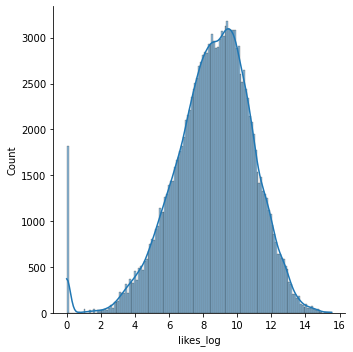

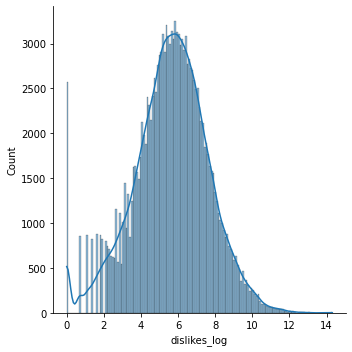

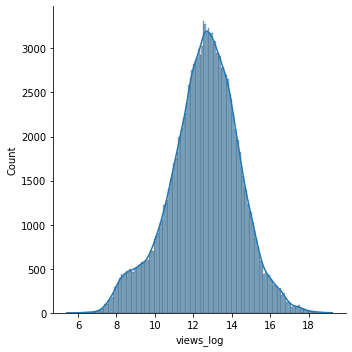

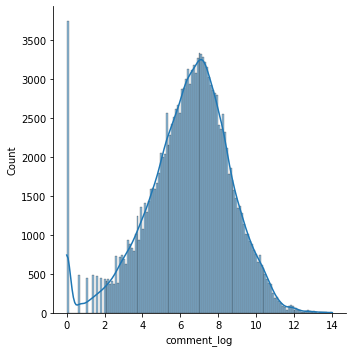

In [22]:
# Your code goes here
# Plots will be manually graded

sns.displot(combined_data['likes_log'],kde=True)
sns.displot(combined_data['dislikes_log'],kde=True)
sns.displot(combined_data['views_log'],kde=True)
sns.displot(combined_data['comment_log'],kde=True)

#### 1.2.4: Comparing views, likes, dislikes against categories (3 pt)

As a next step, try to gain insights into the data using categories, views, likes and dislikes.

Draw three plots:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

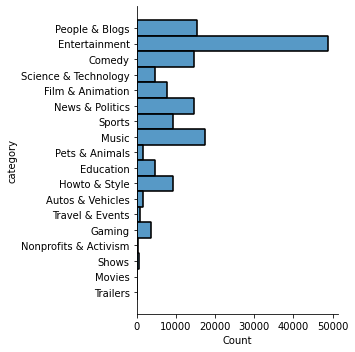

In [23]:
# Your code goes here
# Plots will be manually graded
sns.displot(combined_data[['category']],y='category')

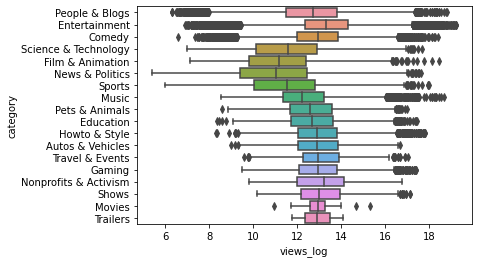

In [24]:
sns.boxplot(data=combined_data,y='category',x='views_log')

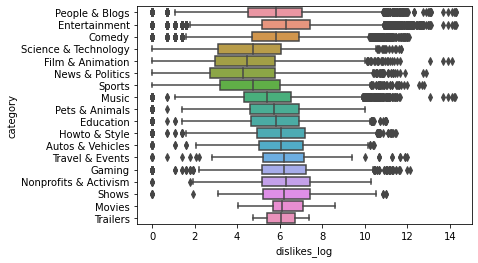

In [25]:
sns.boxplot(data=combined_data,y='category',x='dislikes_log')

#### 1.2.5: Feature Engineering (8 pts)



##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [26]:

combined_data["num_tags"] = combined_data['tags'].apply(lambda x : len(x.split('|')))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
combined_data_copy = combined_data.copy()

##### b. Processing description and title (2 pts.)

Compute the length of description and title and add them as features to the dataset

In [28]:
# Your code goes here
combined_data["desc_len"] = combined_data['description'].apply(lambda x : len(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
# Your code goes here
combined_data["len_title"] = combined_data['title'].apply(lambda x : len(x))




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# Grader cell 3 pts.
grader.grade('check_tags_title_description',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [31]:
import random

In [32]:
# Your code goes here


combined_data['publish_date'] = combined_data['publish_time'].apply(lambda x : x.date)

#day on which video was published
combined_data['publish_weekday']= combined_data['publish_time'].apply(lambda x :x.weekday)
combined_data['publish_time'] = combined_data['publish_time'].apply(lambda x :x.time)

random_index = random.randint(0,combined_data.shape[0]-1)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [33]:
combined_data['publish_weekday'] +=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
# combined_data= combined_data_copy
# combined_data_copy

,trending_date,title,channel_title,category_id,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_date,publish_weekday
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US,10.960027,13.525659,7.995307,9.677528,1,1410,34,2017-11-13,1
1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,People & Blogs,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US,11.484382,14.698775,8.723719,9.449672,4,630,62,2017-11-13,1
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,People & Blogs,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,US,11.891595,14.975981,8.582981,9.009692,23,1177,53,2017-11-12,7
puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,People & Blogs,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,US,9.227492,12.745978,6.502790,7.671827,27,1403,32,2017-11-13,1
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,People & Blogs,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,US,11.792343,14.555413,7.595890,9.771041,14,636,24,2017-11-12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iNHecA3PJCo,2018-06-14,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,Movies,08:01:11,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...,IN,8.099251,12.275501,6.003887,5.283204,19,818,100,2018-06-13,3
dpPmPbhcslM,2018-06-14,Seetha | Flowers | Ep# 364,Flowers TV,24,Movies,11:30:04,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He...",IN,7.454141,12.916148,6.171701,7.264730,8,468,26,2018-06-13,3
mV6aztP58f8,2018-06-14,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,Movies,05:00:02,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...,IN,7.104144,12.864421,6.118097,6.548219,8,2187,57,2018-06-13,3


In [35]:
# Grader cell 4 pts
grader.grade('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##### d. Number of videos per weekday (1 pt)

Compute the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

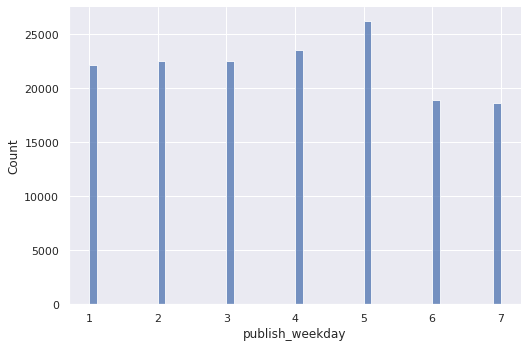

In [36]:
# Your code goes here
# Plots will be manually graded
sns.set_theme()
sns.displot(data = combined_data,x='publish_weekday',aspect=1.5)

#### 1.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [51]:
# Your code goes here
combined_data = combined_data.drop(columns=['title','channel_title','category_id','tags','thumbnail_link','description'])

In [52]:
combined_data = combined_data.drop(columns= ['views','likes','comment_count','dislikes'])

In [53]:
combined_data = combined_data.drop(columns= ['trending_date','publish_time','publish_date'])

#### 1.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [54]:

combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')

# Hint: Use pd.get_dummies()range. 
publish_weekday = pd.get_dummies(combined_data.publish_weekday,prefix='publish')
country = pd.get_dummies(combined_data.country)

In [55]:
combined_data = pd.concat((combined_data,publish_weekday,country),axis=1)
combined_data = combined_data.drop(columns= ['publish_weekday','country'])

In [56]:
category_id	= pd.get_dummies(combined_data.category)
combined_data = pd.concat((combined_data,category_id),axis=1).drop(columns = 'category')

In [57]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_1,publish_2,publish_3,publish_4,publish_5,publish_6,publish_7,CA,FR,IN,US,Autos & Vehicles,Comedy,Education,Entertainment,Film & Animation,Gaming,Howto & Style,Movies,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Trailers,Travel & Events
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2kyS6SvSYSE,False,False,False,10.960027,13.525659,7.995307,9.677528,1,1410,34,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1ZAPwfrtAFY,False,False,False,11.484382,14.698775,8.723719,9.449672,4,630,62,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5qpjK5DgCt4,False,False,False,11.891595,14.975981,8.582981,9.009692,23,1177,53,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
puqaWrEC7tY,False,False,False,9.227492,12.745978,6.502790,7.671827,27,1403,32,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
d380meD0W0M,False,False,False,11.792343,14.555413,7.595890,9.771041,14,636,24,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iNHecA3PJCo,False,False,False,8.099251,12.275501,6.003887,5.283204,19,818,100,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
dpPmPbhcslM,False,False,False,7.454141,12.916148,6.171701,7.264730,8,468,26,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
mV6aztP58f8,False,False,False,7.104144,12.864421,6.118097,6.548219,8,2187,57,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [58]:
# Grader cell 3 pts.
grader.grade('check_final_df',(combined_data.shape))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [59]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')

#### 1.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [71]:
# Your code goes here
label = combined_data['views_log']
features = combined_data.drop(columns= 'views_log')

In [72]:
# Grader cell 1 pt
grader.grade('check_x_y_split',([features.shape, label.describe()]))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 1.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [73]:
from sklearn.model_selection import train_test_split
# Your code goes here
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size = 0.2, random_state = 42)

In [74]:
# Grader cell 1 pt.
grader.grade('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.3.2: Train Machine Learning Models.

#### 1.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Your code goes here

clf = LinearRegression()

clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

mse_test = mean_squared_error(y_test,y_pred)





In [76]:
grader.grade('check_lr', (np.sqrt(mean_squared_error(y_test, y_pred))))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.3.2.2  Dimensionality reduction with PCA (6 pts)



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

In [77]:
import numpy as np
from sklearn.decomposition import PCA
# Your code goes here\

pca = PCA()
pca.fit(features,label)
explained_variance_ratio = pca.explained_variance_ratio_


In [78]:
explained_variance_ratio

array([9.99087838e-01, 7.15345701e-04, 1.75327319e-04, 1.60002693e-05,
       1.43763356e-06, 8.83066934e-07, 4.70161885e-07, 4.05433540e-07,
       3.34797892e-07, 2.24253346e-07, 2.15109756e-07, 2.03441796e-07,
       1.97662093e-07, 1.94570904e-07, 1.71011519e-07, 1.64060605e-07,
       1.17385082e-07, 1.03553075e-07, 7.31655227e-08, 6.89004511e-08,
       5.63883859e-08, 4.37918859e-08, 3.53679482e-08, 2.38479524e-08,
       1.88986590e-08, 1.30491307e-08, 9.34953581e-09, 7.24614646e-09,
       6.41911812e-09, 4.53534271e-09, 3.23404834e-09, 1.71944639e-09,
       6.83976160e-10, 3.06196000e-10, 1.86046134e-11, 9.92996573e-33,
       9.92996573e-33, 9.92996573e-33])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


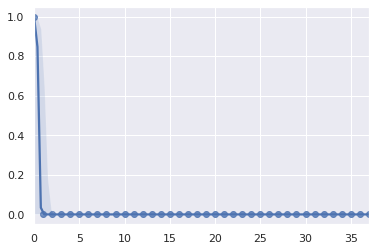

In [79]:
x = [i for i in range(features.shape[1])]
sns.regplot(x = x, y =explained_variance_ratio,logistic=True)


##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [80]:
# Your code goes here
pca = PCA(n_components=4)
x_train= pca.fit_transform(x_train)

In [81]:
# Grader cell 3 pts.
grader.grade('check_pca', (x_train[:50,:]))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.3.2.3 Random Forest. (10 pts)



##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Your code goes here
# Only tune the max depth of the trees in the RF hyperparameter.

depth = [100,120,140,160]
nEstimator = [140]
parameter = {'max_depth':depth,'n_estimators':nEstimator}
reg = RandomForestRegressor()
clf = GridSearchCV(reg,parameter,n_jobs=-1)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [83]:
clf.best_params_

{'max_depth': 160, 'n_estimators': 140}

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [84]:
x_test = pca.transform(x_test)


In [85]:
# Your code goes here
# Set n_estimators = 140
reg = RandomForestRegressor(n_estimators= 140, max_depth=160)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6447092482994016

In [86]:
# Grader cell 10 pts
grader.grade('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred))))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## A Blissful Break

Well done! Almost halfway there :)

Take a well deserved break! Talk to your friends (on zoom, social distancing is important! :P), scroll through your Instagram feed or watch a video. Nothing better than cute dog videos! [Here](https://www.youtube.com/watch?v=hOzxphPUI0s) is our recommendation, we promise that the link works this time :)

# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again


In [60]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 12 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.1 [54.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.1 [37.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5srv-mit11 amd64 1.16-2ubuntu0.1 [49.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5

In [61]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


In [62]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml-hw4').getOrCreate()


In [63]:
%load_ext sparkmagic.magics

In [64]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [65]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


### 2.1 Data for Spark ML (20 points)

We have the spark setup ready. Now we need the fuel for our ML algorithms i.e. the data. We will use the data you processed in Section 1 but in spark. 

Read in the csv that you created into a spark dataframe. Make sure to set the "inferSchema" flag to True when you do this so that the columns are the correct datatypes and not all strings. Also note the parameter to set the first row as column headers.

In [66]:
# Your code goes here

train_sdf = spark.read.csv('/content/combined_data.csv',inferSchema=True,header=True)

Just make sure everything looks good

In [67]:
train_sdf.show()

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+------------------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---+---+---+---+----------------+------+---------+-------------+----------------+------+-------------+------+-----+---------------+---------------------+--------------+--------------+--------------------+-----+------+--------+---------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|publish_1|publish_2|publish_3|publish_4|publish_5|publish_6|publish_7| CA| FR| IN| US|Autos & Vehicles|Comedy|Education|Entertainment|Film & Animation|Gaming|Howto & Style|Movies|Music|News & Politics|Nonprofits & Activism|People & Blogs|Pets & Animals|Science & Technology|Shows|Sports|Trailers|Travel & Events|
+-----------+-----------

In [68]:
## Grader cell, worth 5 points
to_grade = train_sdf.toPandas()
grader.grade('check_spark_load', (to_grade.size, to_grade[:50]))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Print out the dataframe schema and verify the datatypes

In [69]:
#TODO: Print the dataframe schema and verify
# Your code goes here
train_sdf.schema

StructType(List(StructField(video_id,StringType,true),StructField(comments_disabled,BooleanType,true),StructField(ratings_disabled,BooleanType,true),StructField(video_error_or_removed,BooleanType,true),StructField(likes_log,DoubleType,true),StructField(label,DoubleType,true),StructField(dislikes_log,DoubleType,true),StructField(comment_log,DoubleType,true),StructField(num_tags,IntegerType,true),StructField(desc_len,IntegerType,true),StructField(len_title,IntegerType,true),StructField(publish_1,IntegerType,true),StructField(publish_2,IntegerType,true),StructField(publish_3,IntegerType,true),StructField(publish_4,IntegerType,true),StructField(publish_5,IntegerType,true),StructField(publish_6,IntegerType,true),StructField(publish_7,IntegerType,true),StructField(CA,IntegerType,true),StructField(FR,IntegerType,true),StructField(IN,IntegerType,true),StructField(US,IntegerType,true),StructField(Autos & Vehicles,IntegerType,true),StructField(Comedy,IntegerType,true),StructField(Education,Integ

In [70]:
train_sdf.dtypes

[('video_id', 'string'),
 ('comments_disabled', 'boolean'),
 ('ratings_disabled', 'boolean'),
 ('video_error_or_removed', 'boolean'),
 ('likes_log', 'double'),
 ('label', 'double'),
 ('dislikes_log', 'double'),
 ('comment_log', 'double'),
 ('num_tags', 'int'),
 ('desc_len', 'int'),
 ('len_title', 'int'),
 ('publish_1', 'int'),
 ('publish_2', 'int'),
 ('publish_3', 'int'),
 ('publish_4', 'int'),
 ('publish_5', 'int'),
 ('publish_6', 'int'),
 ('publish_7', 'int'),
 ('CA', 'int'),
 ('FR', 'int'),
 ('IN', 'int'),
 ('US', 'int'),
 ('Autos & Vehicles', 'int'),
 ('Comedy', 'int'),
 ('Education', 'int'),
 ('Entertainment', 'int'),
 ('Film & Animation', 'int'),
 ('Gaming', 'int'),
 ('Howto & Style', 'int'),
 ('Movies', 'int'),
 ('Music', 'int'),
 ('News & Politics', 'int'),
 ('Nonprofits & Activism', 'int'),
 ('People & Blogs', 'int'),
 ('Pets & Animals', 'int'),
 ('Science & Technology', 'int'),
 ('Shows', 'int'),
 ('Sports', 'int'),
 ('Trailers', 'int'),
 ('Travel & Events', 'int')]

Great job, we have the processed data now. For Spark ML, we need to create a feature column which has all features concatenated and a single column for labels, which we already have!

We will use VectorAssembler() to create a feature vector from all categorical and numerical features and we call the final vector as “features”.

First, list all columns in the data and store it in a list named all_columns


In [87]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [88]:
# Your code goes here
all_columns = list(train_sdf.columns)


In [89]:
all_columns

['video_id',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'likes_log',
 'label',
 'dislikes_log',
 'comment_log',
 'num_tags',
 'desc_len',
 'len_title',
 'publish_1',
 'publish_2',
 'publish_3',
 'publish_4',
 'publish_5',
 'publish_6',
 'publish_7',
 'CA',
 'FR',
 'IN',
 'US',
 'Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Movies',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Trailers',
 'Travel & Events']

Create a list of columns which you don't wan't to include in your features i.e. the labels and probably other columns which don't help the machine learning model. Name this list drop_columns.

In [90]:
# Your code goes here
drop_columns = ['label','video_id']


In [91]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

Create a VectorAssembler object with columns you want to use. Name your output column as 'features' (because they are the features you would use later), and name your vector assembler object 'assembler'

In [92]:
# Your code goes here
assembler = VectorAssembler(inputCols=columns_to_use,outputCol='features')

In [93]:
columns_to_use

['comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'likes_log',
 'dislikes_log',
 'comment_log',
 'num_tags',
 'desc_len',
 'len_title',
 'publish_1',
 'publish_2',
 'publish_3',
 'publish_4',
 'publish_5',
 'publish_6',
 'publish_7',
 'CA',
 'FR',
 'IN',
 'US',
 'Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Movies',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Trailers',
 'Travel & Events']

In [94]:
# Grader cell, worth 5 points
grader.grade('check_assembler', (str(assembler.params), columns_to_use))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now we will create a pipeline with many stages. For this data, we just need a single stage with the assembler, but you could have other stages before that where you perform operations on the data like converting categorical strings in the features to numeric values, or do feature scaling operations. 

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [95]:
from pyspark.ml import Pipeline

# Your code goes here
pipe = Pipeline(stages=[assembler])
modified_data_sdf = pipe.fit(train_sdf).transform(train_sdf)

In [96]:
#Grader cell, worth 8 points
to_grade_df = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
grader.grade('check_pipeline', (to_grade_df.columns.values, to_grade_df['features'][0].size))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now that we have the data in the format we need, we will create out train and test sets. Split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [97]:
modified_data_sdf.show()

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+------------------+--------+--------+---------+---------+---------+---------+---------+---------+---------+---------+---+---+---+---+----------------+------+---------+-------------+----------------+------+-------------+------+-----+---------------+---------------------+--------------+--------------+--------------------+-----+------+--------+---------------+--------------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|publish_1|publish_2|publish_3|publish_4|publish_5|publish_6|publish_7| CA| FR| IN| US|Autos & Vehicles|Comedy|Education|Entertainment|Film & Animation|Gaming|Howto & Style|Movies|Music|News & Politics|Nonprofits & Activism|People & Blogs|Pets & Animals|Science & Technology|Shows|Sports|Trailers|Travel & Events|    

In [186]:
# Your code goes here
train_sdf = modified_data_sdf.sample(fraction=0.8)
test_sdf = modified_data_sdf.sample(fraction=0.2)

In [187]:
#Grader cell, worth 2 points
grader.grade('check_split', (train_sdf.count(), test_sdf.count()))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.2 Linear regression using Spark ML (15 points)

Time to do the cool stuff, let's train a linear regression model to our data and try to predict the views again! This time, we will use "Big" data tools. Using Spark ML's linear regression, create a model, fit the training data. We will then see the summary stats for the model - the RMSE error, R2 score and other information you find useful. Look up the documentation online and try to understand how to implement this.

Firstly, train a model without any regularization!

In [107]:
from pyspark.ml.regression import LinearRegression

# Your code goes here

lr_model = LinearRegression()
lr_model = lr_model.fit(train_sdf)

In [110]:
trainingSummary = lr_model.summary

print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)



RMSE: 0.683798
r2: 0.858303


In [111]:
#Grader cell, worth 4 points

grader.grade('check_lr_train', (trainingSummary.rootMeanSquaredError, trainingSummary.r2) )

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, find out how good the model actually is and see if it overfits the training data. Predict the views for your test data (hint: it is called 'transform' in spark ml) and evaluate the performance using 'RegressionEvaluator' object in the Spark ML Regression library. Your prediction column should be named 'prediction'.

In [112]:
# Your code goes here
predictions = lr_model.transform(test_sdf)


In [115]:
from pyspark.ml.evaluation import RegressionEvaluator

# TODO: Compute root mean squared error on the test set
eva = RegressionEvaluator()
test_rmse_orig = eva.evaluate(predictions)

In [116]:
#Grader cell, worth 4 points
predictions_to_grade = predictions.toPandas()
answer = [test_rmse_orig, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50]]
grader.grade('check_lr_test', answer)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Now, we will add regularization to avoid overfitting. Play around with different regularization parameters - try out LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2) and different regularization hyperparameters when initializing 3 different regularized linear regression models. Compare these with each other and the non regularized regression done above.

In [122]:
# Your code goes here
# Compute predictions using each of the models
l1_predictions = LinearRegression(elasticNetParam=1.0,regParam=0.3).fit(train_sdf).transform(test_sdf)
l2_predictions = LinearRegression(elasticNetParam=0.0,regParam=0.3).fit(train_sdf).transform(test_sdf)
elastic_net_predictions = LinearRegression(elasticNetParam=0.25,regParam=0.3).fit(train_sdf).transform(test_sdf)

# TODO: Compute root mean squared error on test set for each of your models

test_rmse_l1 = eva.evaluate(l1_predictions)
test_rmse_l2 = eva.evaluate(l2_predictions)
test_rmse_elastic = eva.evaluate(elastic_net_predictions)


In [123]:
# Grader cell, worth 7 points
answer = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
grader.grade('check_lr_all', answer)

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3 Random Forest Regression (10 points)

As a data scientist, if you are looking to win competitions, you definitely must know about random forests, boosted trees etc. These ensemble methods generalize well and work surprisingly well for a lot of classification problems and sometimes for regression problems. So let's give it a go with our problem. Just like the linear regression model, create a random forest regressor model, fit the training data and evaluate using RegressionEvaluator. Compare the performance on the test set with the Linear Regression model

In [125]:
from pyspark.ml.regression import RandomForestRegressor
# Your code goes here
rf_model = RandomForestRegressor().fit(train_sdf)


In [126]:
# Your code goes here
#TODO : Predictions on the test set
predictions = rf_model.transform(test_sdf)



In [127]:
from pyspark.ml.evaluation import RegressionEvaluator

# Your code goes here
eva = RegressionEvaluator()
train_rmse_rf = eva.evaluate(rf_model.transform(train_sdf))
rmse_rf = eva.evaluate(predictions)

In [128]:
#Grader cell, worth 10 points
predictions_to_grade = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], rmse_rf]
grader.grade('check_rf_spark', answer)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.4 Dimensionality Reduction using PCA (10 points)

We will again use the powerful PCA to reduce the dimensions and project the data onto a lower dimensional space and do linear regression on the new projected data. Choose an appropriate value for the number of dimensions - you already found out this number in section 1!


Steps for this section
1.   Initialize a PCA model
2.   Fit the model using the training data
3.   Get the PCA feature from the trained model
4.   Train a linear regression model using the PCA features
5.   Evaluate the performance on the test set 

Note that this section deliberately gives less starter code to allow you to go through the documentation and implement, as you will be doing as future data scientists! 





In [195]:
# Your code goes here
from pyspark.ml.feature import PCA
pca_model = PCA(k=25,inputCol='features',outputCol='pca').fit(train_sdf)
train_pca = pca_model.transform(train_sdf)
lr_model = LinearRegression(featuresCol='pca',regParam=0.1,elasticNetParam=0.0).fit(train_pca)
training_rmse_pca = eva.evaluate(lr_model.transform(train_pca))

In [ ]:
train_pca.show()

In [196]:
# Your code goes here
predictions = lr_model.transform(pca_model.transform(test_sdf))

test_rmse_pca = eva.evaluate(predictions)

In [197]:
# Your code goes here
predictions_to_grade = predictions.toPandas()
answer = [training_rmse_pca, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca]
grader.grade('check_pca_spark', answer)

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Feedback Form
Feel free to fill out [this form](https://forms.gle/DbDuEbqqifoFrRxaA) with any feedback for this and prior homeworks.

# HW Submission

**Double check that you have the correct PennID (all numbers) in the autograder**. 

Go to the "File" tab at the top left, and click "Download .ipynb". Zip it (name doesn't matter). 

You must submit your notebook to GradeScope to receive credit.